To test if and how the model functions in extreme conditions, the model is run with the 500yr floodmap for 100 iterations. This is the most extreme floodmap that was given in the base model. It displays a severe flood that only happens every 500 years. In the model, this will result in high values for flood depth of households. The following hypotheses are stated on how the model will function in these conditions to show that the model still functions as it is supposed to:

1. The total damage actually experienced will be a lot higher as adaptation measures are not up to the high values of flood depth
2. A lot more households will opt for adaptation measures since the estimated prevented damage will exceed the adaptation costs more often
3. Another reason more households will opt for adaptation measures is because the location of households will more likely be in a floodplain, resulting in a higher chance of receiving an initial flood perception of 3 or 4, which is one of the main factors for choosing adaptation measures

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
#In this block, the data from the base case run and the extreme values run are loaded into dataframes
extreme_values_file_path = r'../output_data/ExtremeValuesModelVars.csv'
extreme_values = pd.read_csv(extreme_values_file_path)

base_case_file_path = r'../output_data/BaseCase.csv'
base_case = pd.read_csv(base_case_file_path)



In [18]:
#This block isolates the TotalActualDamage columns of both DataFrames and merges them into one for further analysis
extreme_values_actual_damage = extreme_values[['RunId', 'TotalActualDamage']]
extreme_values_actual_damage.rename(columns={'TotalActualDamage':'ActualDamageExtremeValues'}, inplace=True)
base_case_actual_damage = base_case[['RunId', 'TotalActualDamage']]
base_case_actual_damage.rename(columns={'TotalActualDamage':'ActualDamageBaseCase'}, inplace=True) 

merged_actual_damage = pd.merge(extreme_values_actual_damage, base_case_actual_damage, on='RunId')
merged_actual_damage

C:\Users\matth\AppData\Local\Temp\ipykernel_112844\3270133227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extreme_values_actual_damage.rename(columns={'TotalActualDamage':'ActualDamageExtremeValues'}, inplace=True)
C:\Users\matth\AppData\Local\Temp\ipykernel_112844\3270133227.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_case_actual_damage.rename(columns={'TotalActualDamage':'ActualDamageBaseCase'}, inplace=True)


,RunId,ActualDamageExtremeValues,ActualDamageBaseCase
0,1,2.040776e+07,5.153366e+07
1,2,1.874936e+07,4.858503e+07
2,0,2.221370e+07,4.980319e+07
3,6,2.111408e+07,4.287050e+07
4,5,1.980662e+07,4.754899e+07
...,...,...,...
95,93,2.143896e+07,4.948546e+07
96,94,2.163350e+07,4.383898e+07
97,98,2.152856e+07,4.511658e+07
98,97,1.907392e+07,4.987396e+07


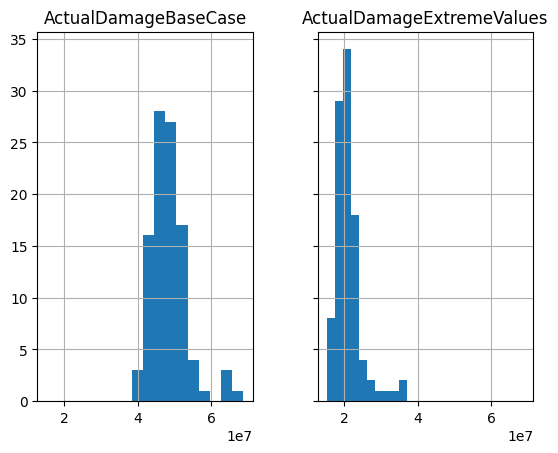

In [24]:
histogram_actual_damage = merged_actual_damage.hist([ 'ActualDamageBaseCase','ActualDamageExtremeValues'], sharex = True, sharey= True)

In [26]:
extreme_values_adapted_households = extreme_values[['RunId', 'TotalAdaptedHouseholds']]
extreme_values_adapted_households.rename(columns={'TotalAdaptedHouseholds':'AdaptedHouseholdsExtremeValues'}, inplace=True)
base_case_adapted_households = base_case[['RunId', 'TotalAdaptedHouseholds']]
base_case_adapted_households.rename(columns={'TotalAdaptedHouseholds':'AdaptedHouseholdsBaseCase'}, inplace=True)

merged_adapted_households = pd.merge(base_case_adapted_households, extreme_values_adapted_households, on='RunId')
merged_adapted_households

C:\Users\matth\AppData\Local\Temp\ipykernel_112844\1146753372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extreme_values_adapted_households.rename(columns={'TotalAdaptedHouseholds':'AdaptedHouseholdsExtremeValues'}, inplace=True)
C:\Users\matth\AppData\Local\Temp\ipykernel_112844\1146753372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base_case_adapted_households.rename(columns={'TotalAdaptedHouseholds':'AdaptedHouseholdsBaseCase'}, inplace=True)


,RunId,AdaptedHouseholdsBaseCase,AdaptedHouseholdsExtremeValues
0,0,458,415
1,1,581,358
2,2,556,415
3,5,605,360
4,7,583,390
...,...,...,...
95,92,646,407
96,99,565,387
97,96,575,349
98,97,531,397


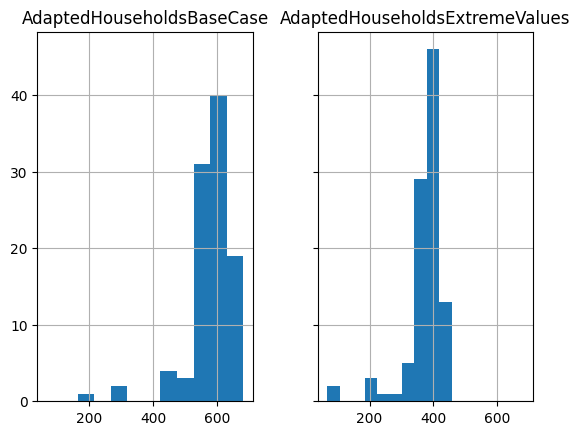

In [27]:
histogram_adapted_households = merged_adapted_households.hist(['AdaptedHouseholdsBaseCase','AdaptedHouseholdsExtremeValues'], sharex = True, sharey= True)